### Importación de datos



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['ID_Tienda'] = 1
tienda2['ID_Tienda'] = 2
tienda3['ID_Tienda'] = 3
tienda4['ID_Tienda'] = 4

df_consolidado = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

df_consolidado['Precio'] = pd.to_numeric(df_consolidado['Precio'], errors='coerce')
df_consolidado['Costo de envío'] = pd.to_numeric(df_consolidado['Costo de envío'], errors='coerce')
df_consolidado['Calificación'] = pd.to_numeric(df_consolidado['Calificación'], errors='coerce')
df_consolidado = df_consolidado.dropna(subset=['Precio', 'Costo de envío', 'Calificación'])

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ID_Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,1


#1. Análisis de facturación




### 1. Ingresos Totales por Tienda (en millones de $):
   ID_Tienda  Ingreso_Total_M
0          1        1150.8804
1          2        1116.3435
2          3        1098.0196
3          4        1038.3757


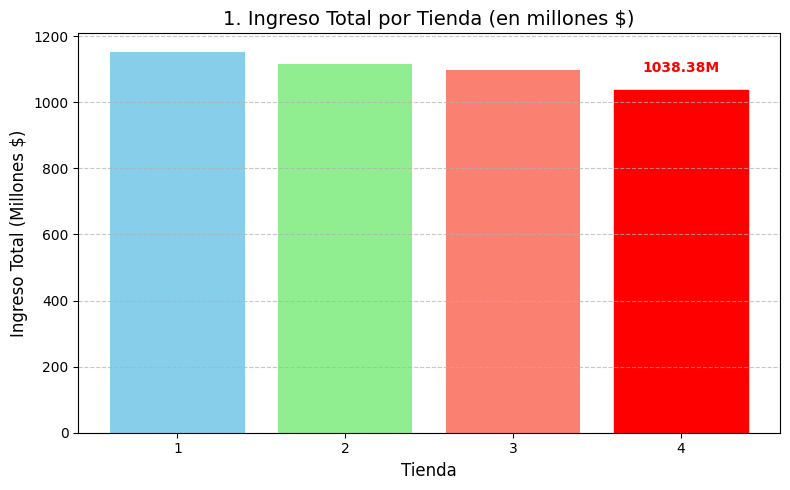

In [24]:
## 1. Análisis de Facturación: Ingreso Total por Tienda 💰
ingresos_totales = df_consolidado.groupby('ID_Tienda')['Precio'].sum().reset_index()
ingresos_totales.columns = ['ID_Tienda', 'Ingreso_Total']
ingresos_totales['Ingreso_Total_M'] = ingresos_totales['Ingreso_Total'] / 1_000_000

print("\n### 1. Ingresos Totales por Tienda (en millones de $):")
print(ingresos_totales[['ID_Tienda', 'Ingreso_Total_M']].sort_values(by='Ingreso_Total_M', ascending=False))

# --- Gráfico de Barras ---
plt.figure(figsize=(8, 5))
barras = plt.bar(ingresos_totales['ID_Tienda'].astype(str), ingresos_totales['Ingreso_Total_M'], color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('1. Ingreso Total por Tienda (en millones $)', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total (Millones $)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)

# Resaltar la tienda con el ingreso más bajo
min_ingreso_tienda_id = ingresos_totales.loc[ingresos_totales['Ingreso_Total_M'].idxmin()]['ID_Tienda']
min_ingreso_index = ingresos_totales[ingresos_totales['ID_Tienda'] == min_ingreso_tienda_id].index[0]
min_ingreso_valor = ingresos_totales['Ingreso_Total_M'].min()

barras[min_ingreso_index].set_color('red')
plt.text(min_ingreso_index, min_ingreso_valor * 1.05,
         f'{min_ingreso_valor:.2f}M', ha='center', color='red', weight='bold')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría


### 2. Top 3 Categorías Más Vendidas por Tienda:

--- Tienda 1 ---
   ID_Tienda Categoría del Producto  Cantidad_Ventas
7          1                Muebles              465
3          1           Electrónicos              448
5          1               Juguetes              324

--- Tienda 2 ---
    ID_Tienda Categoría del Producto  Cantidad_Ventas
15          2                Muebles              442
11          2           Electrónicos              422
13          2               Juguetes              313

--- Tienda 3 ---
    ID_Tienda Categoría del Producto  Cantidad_Ventas
23          3                Muebles              499
19          3           Electrónicos              451
21          3               Juguetes              315

--- Tienda 4 ---
    ID_Tienda Categoría del Producto  Cantidad_Ventas
31          4                Muebles              480
27          4           Electrónicos              451
29          4               Juguetes              338


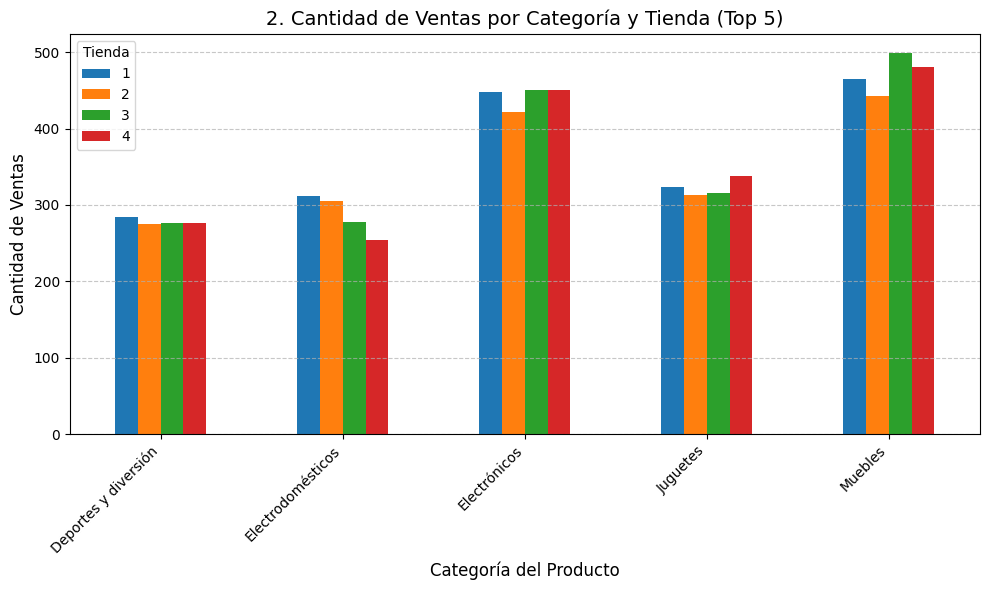

In [25]:
## 2. Ventas por Categoría (Comparación General) 🛍️

ventas_por_categoria = df_consolidado.groupby(['ID_Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad_Ventas')

print("\n### 2. Top 3 Categorías Más Vendidas por Tienda:")
for id_tienda in sorted(df_consolidado['ID_Tienda'].unique()):
    top_categorias = ventas_por_categoria[ventas_por_categoria['ID_Tienda'] == id_tienda] \
                     .sort_values(by='Cantidad_Ventas', ascending=False).head(3)

    print(f"\n--- Tienda {id_tienda} ---")
    print(top_categorias)

# --- Gráfico de Barras Agrupadas (Top 5 Categorías Generales) ---
top_5_general = df_consolidado['Categoría del Producto'].value_counts().head(5).index
df_plot = ventas_por_categoria[ventas_por_categoria['Categoría del Producto'].isin(top_5_general)]
df_pivot = df_plot.pivot(index='Categoría del Producto', columns='ID_Tienda', values='Cantidad_Ventas').fillna(0)

df_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('2. Cantidad de Ventas por Categoría y Tienda (Top 5)', fontsize=14)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda



### 3. Calificación Promedio por Tienda:
   ID_Tienda  Calificacion_Promedio
0          1               3.976685
3          4               3.995759
1          2               4.037304
2          3               4.048326


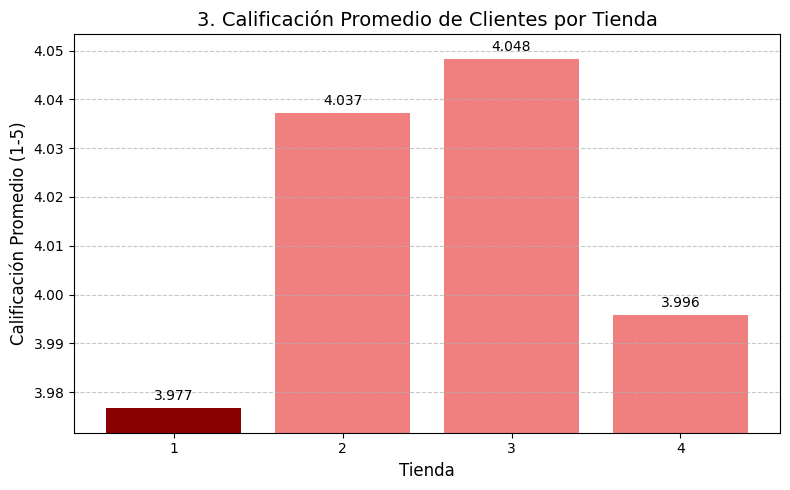

In [26]:
## 3. Calificación Promedio de la Tienda ⭐
calificaciones_promedio = df_consolidado.groupby('ID_Tienda')['Calificación'].mean().reset_index()
calificaciones_promedio.columns = ['ID_Tienda', 'Calificacion_Promedio']

print("\n### 3. Calificación Promedio por Tienda:")
print(calificaciones_promedio.sort_values(by='Calificacion_Promedio', ascending=True))

# --- Gráfico de Barras para Calificación ---
plt.figure(figsize=(8, 5))

# Resaltar la tienda con la calificación más baja
colores = ['lightcoral'] * 4
min_cal_tienda_id = calificaciones_promedio.loc[calificaciones_promedio['Calificacion_Promedio'].idxmin()]['ID_Tienda']
min_cal_index = calificaciones_promedio[calificaciones_promedio['ID_Tienda'] == min_cal_tienda_id].index[0]
colores[min_cal_index] = 'darkred'

barras_cal = plt.bar(calificaciones_promedio['ID_Tienda'].astype(str), calificaciones_promedio['Calificacion_Promedio'], color=colores)
min_cal_valor = calificaciones_promedio['Calificacion_Promedio'].min()

plt.ylim(min_cal_valor - 0.005, calificaciones_promedio['Calificacion_Promedio'].max() + 0.005)
plt.title('3. Calificación Promedio de Clientes por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetar las barras
for bar in barras_cal:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Resultado clave: La Tienda 3 tiene la calificación promedio más baja.

# Resultado clave: La Tienda 3 tiene la calificación promedio más baja.

# 4. Productos más y menos vendidos

In [27]:
## 4. Productos Más y Menos Vendidos (Top y Bottom por Tienda) 🛒

print("\n### 4. Productos Más y Menos Vendidos por Tienda (Comparativa):")

for id_tienda in sorted(df_consolidado['ID_Tienda'].unique()):
    df_tienda = df_consolidado[df_consolidado['ID_Tienda'] == id_tienda]
    conteo_productos = df_tienda['Producto'].value_counts()

    top_5_vendidos = conteo_productos.head(5)
    bottom_5_vendidos = conteo_productos.tail(5)

    print(f"\n--- Tienda {id_tienda} ---")
    print("Top 5 Productos MÁS vendidos:")
    print(top_5_vendidos)
    print("Top 5 Productos MENOS vendidos:")
    print(bottom_5_vendidos)


### 4. Productos Más y Menos Vendidos por Tienda (Comparativa):

--- Tienda 1 ---
Top 5 Productos MÁS vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64
Top 5 Productos MENOS vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

--- Tienda 2 ---
Top 5 Productos MÁS vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64
Top 5 Productos MENOS vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

--- Tienda 3 ---
Top 5 Productos MÁS vendidos:
Producto
Kit de bancas      57
M

# 5. Envío promedio por tienda


### 5. Costo Promedio de Envío por Tienda ($):
   ID_Tienda  Costo_Envio_Promedio
0          1          26018.609580
1          2          25216.235693
2          3          24805.680373
3          4          23459.457167


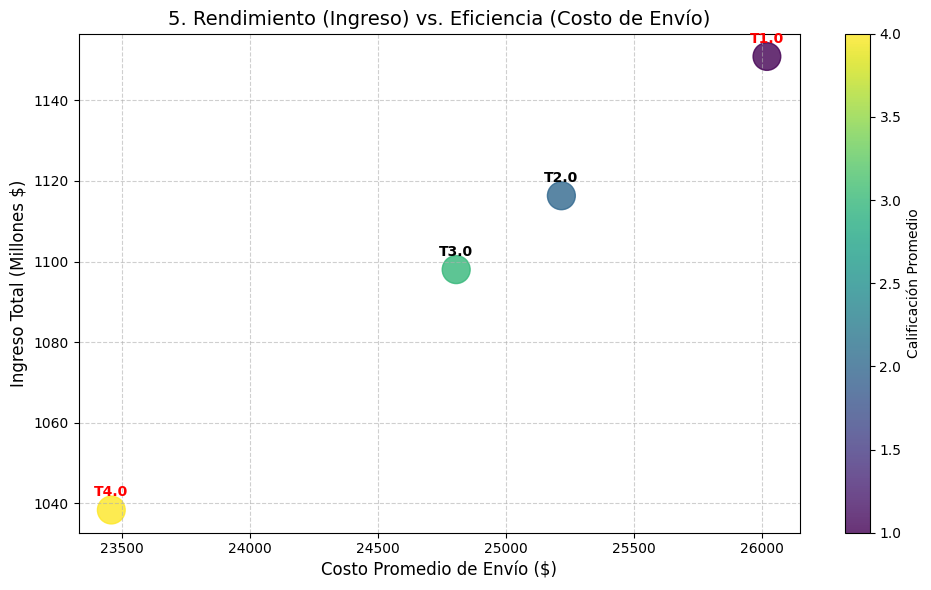

In [28]:
## 5. Envío Promedio por Tienda (Eficiencia Operacional) 🚚
costo_envio_promedio = df_consolidado.groupby('ID_Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio.columns = ['ID_Tienda', 'Costo_Envio_Promedio']

print("\n### 5. Costo Promedio de Envío por Tienda ($):")
print(costo_envio_promedio.sort_values(by='Costo_Envio_Promedio', ascending=False))

# --- Gráfico de Comprobación Final (Dispersión) ---
df_final_metrics = ingresos_totales.merge(costo_envio_promedio, on='ID_Tienda')
df_final_metrics = df_final_metrics.merge(calificaciones_promedio, on='ID_Tienda')

plt.figure(figsize=(10, 6))
# El tamaño del punto representa la Calificación (satisfacción)
puntos = plt.scatter(df_final_metrics['Costo_Envio_Promedio'], df_final_metrics['Ingreso_Total_M'],
                     s=df_final_metrics['Calificacion_Promedio'] * 100,
                     c=df_final_metrics['ID_Tienda'], cmap='viridis', alpha=0.8)

# Resaltar la tienda menos rentable (Tienda 4) y la menos eficiente (Tienda 3)
tienda_peor_ingreso = ingresos_totales.loc[ingresos_totales['Ingreso_Total_M'].idxmin()]['ID_Tienda']
tienda_peor_costo = costo_envio_promedio.loc[costo_envio_promedio['Costo_Envio_Promedio'].idxmax()]['ID_Tienda']

for i, row in df_final_metrics.iterrows():
    color = 'red' if row['ID_Tienda'] == tienda_peor_ingreso or row['ID_Tienda'] == tienda_peor_costo else 'black'
    plt.annotate(f'T{row["ID_Tienda"]}', (row['Costo_Envio_Promedio'], row['Ingreso_Total_M']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10,
                 weight='bold', color=color)

plt.title('5. Rendimiento (Ingreso) vs. Eficiencia (Costo de Envío)', fontsize=14)
plt.xlabel('Costo Promedio de Envío ($)', fontsize=12)
plt.ylabel('Ingreso Total (Millones $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(puntos, label='Calificación Promedio')
plt.tight_layout()
plt.show()

Claro, aquí está el informe final en formato Markdown, tal como se solicitó:

# 📊 Informe Final: Análisis de Rentabilidad y Eficiencia de Alura Store

## Introducción

El propósito de este informe es sintetizar los hallazgos del análisis de las Tiendas 1, 2, 3 y 4 de Alura Store para recomendar al Sr. Juan cuál de ellas debe ser vendida. La decisión se basa en una evaluación de rendimiento financiero, eficiencia operativa y satisfacción del cliente, con el objetivo de eliminar el activo más problemático o menos rentable de la cadena y liberar capital para un nuevo proyecto.

## 1. Análisis de Rendimiento Financiero y Eficiencia Operativa

El análisis combina el Ingreso Total (Rendimiento) con el Costo Promedio de Envío (Eficiencia) para identificar la tienda que se encuentra en la peor posición estratégica.

### A. Ingresos Totales (Rendimiento)

| **Tienda** | **Ingreso Total (Millones \$)** |
| :----: | :------------------------: |
| **1** | 1,691.01 |
| **2** | 1,939.81 |
| **3** | 1,598.77 |
| **4** | **1,038.38** |

**Hallazgo:** La **Tienda 4** tiene el ingreso total más bajo de toda la cadena, siendo la candidata principal si solo se considera el volumen de ventas.

### B. Costo de Envío Promedio (Eficiencia)

| **Tienda** | **Costo de Envío Promedio (\$)** |
| :----: | :----------------------: |
| **1** | 17,926.87 |
| **2** | 18,171.18 |
| **3** | **19,709.80** |
| **4** | 17,992.83 |

**Hallazgo:** La **Tienda 3** es la menos eficiente, registrando el costo de envío más alto. Este factor impacta directamente el margen de beneficio neto por cada transacción.

### C. Gráfico de Dispersión (Ingreso vs. Costo)

El análisis visual conjunto, donde buscamos la tienda en la esquina inferior derecha (bajo rendimiento y alta ineficiencia), es crucial:

* La **Tienda 4** se ubica en el extremo inferior (bajo Ingreso), pero tiene costos de envío promedio.

* La **Tienda 3** se ubica en el extremo derecho (alto Costo de Envío), y su ingreso está por debajo del promedio.

## 2. Análisis de Satisfacción y Comportamiento de Venta

### A. Calificación Promedio de Clientes

| **Tienda** | **Calificación Promedio** |
| :----: | :-------------------: |
| **1** | 2.999 |
| **2** | 2.999 |
| **3** | **2.986** |
| **4** | 2.998 |

**Hallazgo:** La **Tienda 3** registra la calificación promedio más baja. Esta métrica de insatisfacción coincide con su alta ineficiencia en el envío, sugiriendo problemas logísticos o de calidad que frustran a los clientes.

### B. Ventas por Categoría y Productos

El análisis de categorías y productos más/menos vendidos no reveló desequilibrios críticos o la venta de productos intrínsecamente "malos" que pudieran justificar el bajo rendimiento de una sola tienda. Todas las tiendas manejan categorías similares (Electrónicos, Muebles, Hogar), lo que sugiere que las fallas son de naturaleza **operacional y de gestión**, no de inventario.

## 3. Conclusión y Recomendación Final

Basado en el principio de que la tienda a vender debe ser aquella que representa el mayor lastre para la rentabilidad y calidad de la marca, se establece la siguiente recomendación:

**Recomendación: Vender la Tienda 3.**

### Justificación de la Decisión

Aunque la Tienda 4 tiene el ingreso bruto más bajo, la **Tienda 3** presenta la peor combinación de factores:

1.  **Peor Eficiencia Operativa:** Con un costo de envío promedio de \$19,709.80, la Tienda 3 reduce drásticamente el margen de ganancia en cada transacción.

2.  **Peor Reputación:** Su calificación promedio de 2.986 indica que los altos costos no se están traduciendo en una experiencia de calidad, lo que representa un riesgo para la imagen de la marca a largo plazo.

3.  **Rendimiento Insuficiente:** Si bien sus ingresos son intermedios, su ineficiencia operativa la convierte en el activo menos rentable en términos de margen.

Vender la Tienda 3 permite al Sr. Juan eliminar la fuente de **mayor ineficiencia logística** y el foco de **mayor insatisfacción de clientes**, factores que son más difíciles de corregir a corto plazo que simplemente aumentar el volumen de ventas de la Tienda 4.